In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import seaborn as sb

In [36]:
(train_x,train_y),(test_x,test_y) = tf.keras.datasets.mnist.load_data()

In [37]:
train_x_flatten = train_x.reshape(len(train_x),28*28)
test_x_flatten = test_x.reshape(len(test_x),28*28)

In [38]:
model = tf.keras.Sequential([
    layers.Dense(100,input_shape =(784,),activation= 'relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [39]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x = train_x_flatten, y = train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9935 - accuracy: 0.8461
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4558 - accuracy: 0.8993
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3064 - accuracy: 0.9269
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2108 - accuracy: 0.9439
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1755 - accuracy: 0.9529
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1587 - accuracy: 0.9565
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1403 - accuracy: 0.9616
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1315 - accuracy: 0.9648
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1236 - accuracy: 0.9669
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1

In [40]:
acc = history.history['accuracy']
loss = history.history['loss']

Text(0.5, 1.0, 'Training Accuracy')

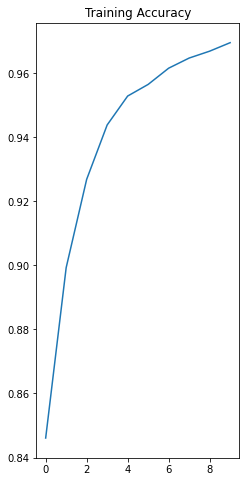

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label = 'Training accuracy')
plt.title('Training Accuracy')


Text(0.5, 1.0, 'Training Loss')

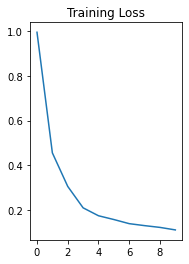

In [42]:
plt.subplot(1,2,2)
plt.plot(range(10),loss,label = 'Training loss')
plt.title('Training Loss')

In [43]:
model.evaluate(x=test_x_flatten,y = test_y)

313/313 [==============================] - 2s 6ms/step - loss: 0.1909 - accuracy: 0.9572


[0.19085364043712616, 0.9571999907493591]

Text(69.0, 0.5, 'Truth')

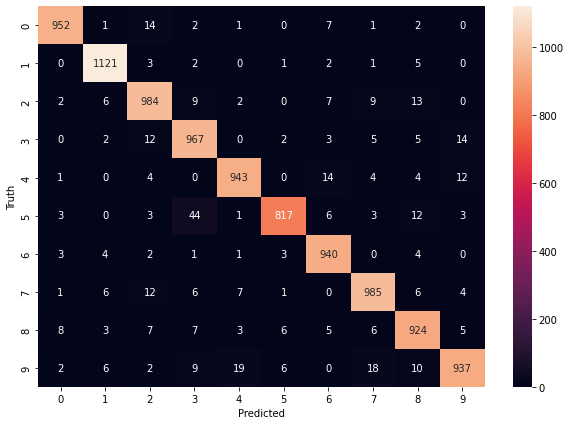

In [45]:
y_predicted = model.predict(test_x_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=test_y,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')